In [1]:
%matplotlib inline
import xarray as xr
import numpy as np 
import glob 
import os 
from tdigest import TDigest
import matplotlib
import matplotlib.pyplot as plt

os.chdir
## include your data here (eg. gsv data, nextGEMS, must be on lat lon grid) ## 
filePathData = "/esarchive/scratch/alacima/projects/destination_earth/icon/*.nc"
fileList = glob.glob(filePathData) 
fileList.sort() 


In [2]:
# creating the data set 
# data = xr.open_dataset(fileList[0]) # open dataset
# uas = np.squeeze(data.uas)
# vas = np.squeeze(data.vas)
# u = np.sqrt(np.square(vas[:,100:200,100:200]) + np.square(uas[:,100:200,100:200])) # selecting random part of the world 
# u_all = u

# for x in range(1, np.size(fileList)):
#     data = xr.open_dataset(fileList[x]) # open dataset
#     uas = np.squeeze(data.uas)
#     vas = np.squeeze(data.vas)
#     u = np.sqrt(np.square(vas[:,100:200,100:200]) + np.square(uas[:,100:200,100:200])) # selecting random part of the world 
#     u_all = xr.concat([u_all, u], "time")

# file_path = "/home/bsc32/bsc32263/git/one_pass/tests/u_speed_10months.nc"
# u_all.to_netcdf(file_path, mode = 'w')


In [11]:
file_path_data = "/home/bsc32/bsc32263/git/one_pass/tests/uas_10_months.nc"

#file_path_data = "/home/bsc32/bsc32263/git/one_pass/tests/u_speed_10months.nc"
#file_path_data = os.path.realpath(os.path.join(os.path.dirname(__file__), 'tests', 'uas_10_months.nc'))

fileList = glob.glob(file_path_data) 
fileList.sort() 
data = xr.open_dataset(fileList[0])  
data = data.astype(np.float64)

In [13]:
uas = data.uas

In [9]:
u_all = data.__xarray_dataarray_variable__

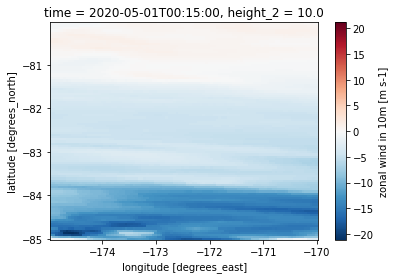

In [14]:
u_2d = uas[0,:,:]

u_2d.plot()

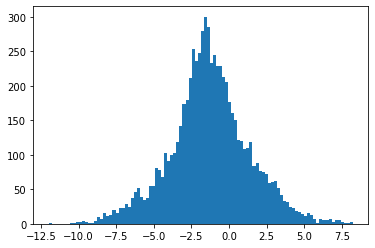

In [16]:
# looking at 1 lat lon point 
u_point = uas[:, 50,50]

plt.hist(u_point, bins = 100)
plt.show()


In [17]:
u_point[0].values

array(-4.67134953)

In [18]:
digest = TDigest() 
for x in range(np.size(u_point)):
    #print(u_point[x])
    digest.update(u_point[x].values)

In [19]:
digest.percentile(50)

-1.3694458763310935

In [20]:
np.percentile(u_point, 50)

-1.3686416745185852

In [15]:
u_dict = digest.to_dict()

In [23]:
u_cent = u_dict['centroids']
u_cent


[{'m': 0.021792609244585037, 'c': 1.0},
 {'m': 0.05838185176253319, 'c': 1.0},
 {'m': 0.09923160076141357, 'c': 1.0},
 {'m': 0.1425447165966034, 'c': 1.0},
 {'m': 0.1667899489402771, 'c': 1.0},
 {'m': 0.18228963017463684, 'c': 1.0},
 {'m': 0.18874509632587433, 'c': 1.0},
 {'m': 0.19906920194625854, 'c': 1.0},
 {'m': 0.21609939634799957, 'c': 1.0},
 {'m': 0.2426895946264267, 'c': 1.0},
 {'m': 0.2495688498020172, 'c': 1.0},
 {'m': 0.25186973810195923, 'c': 1.0},
 {'m': 0.2529546320438385, 'c': 1.0},
 {'m': 0.2558019161224365, 'c': 1.0},
 {'m': 0.2678576707839966, 'c': 1.0},
 {'m': 0.2844679057598114, 'c': 1.0},
 {'m': 0.2980521321296692, 'c': 1.0},
 {'m': 0.31539225578308105, 'c': 1.0},
 {'m': 0.320986807346344, 'c': 1.0},
 {'m': 0.36650902032852173, 'c': 1.0},
 {'m': 0.3879964053630829, 'c': 1.0},
 {'m': 0.3883344829082489, 'c': 1.0},
 {'m': 0.3936391770839691, 'c': 1.0},
 {'m': 0.3939174711704254, 'c': 1.0},
 {'m': 0.394619345664978, 'c': 1.0},
 {'m': 0.4082048535346985, 'c': 1.0},
 {'

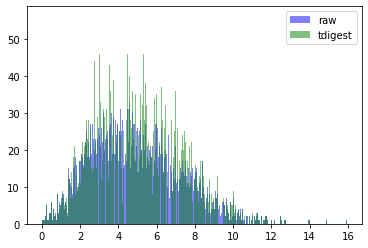

In [47]:
# looking at 1 lat lon point 
u_point = u_all[:, 50,50]

m_values = [x['m'] for x in u_cent]
c_values = [x['c'] for x in u_cent]

#plt.hist(m_values, m_values, weights=c_values)
plt.hist(u_point, bins = 723, alpha = 0.5, color = 'blue', label = 'raw')

plt.hist(m_values, np.size(m_values), weights = c_values, alpha = 0.5, color = 'green', label='tdigest')

#plt.bar(m_values, c_values, color = 'green', label='tdigest')

plt.legend(loc='upper right')
plt.show()

In [30]:
u_point[x].values

array(-0.41833296)

In [42]:
# going to calculate the accuracy of the t-digest against numpy.percentile 
# calculating as a percentage difference between the two sets 


# BECAUSE THE VALUES ARE CENTERED AROUND 0, ARTIFICALLY ADDING 100 TO THE DATASET TO RECENTER 
lat_len = 51
perc_len = 101

per_dif = np.zeros([perc_len, lat_len])
per_change = np.zeros([perc_len, lat_len])
dif = np.zeros([perc_len, lat_len])

for y in range(0, lat_len):
    # looping through latitude 
    u_point = uas[:, y, 50] + 100 # fixing longitude (time, lat, lon)

    digest = TDigest() 

    # generating t-digest 
    for xt in range(np.size(u_point)):
        #print(u_point[x])
        digest.update(u_point[xt].values) # this is a single value 

    # comparing t-digest against np.perctile for every percentile 0 - 100 
    for x in range(0, perc_len):
        np_per = np.percentile(u_point, x)
        tdig_per = digest.percentile(x)
        diff = np.abs(np_per - tdig_per)
        av = np.mean([np_per,tdig_per])

        per_dif[x, y] = abs(diff/av)
        per_change[x, y] = abs(diff/np_per)
        dif[x, y] = diff

per_dif = per_dif*100
per_change = per_change*100


<function matplotlib.pyplot.show(*args, **kw)>

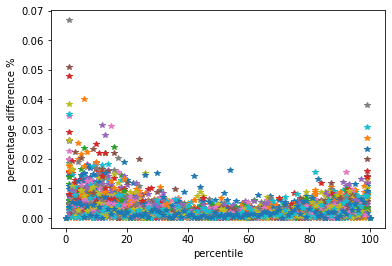

In [46]:
percentile_lin = np.linspace(0, 100, perc_len)

for y in range(0, lat_len):
    plt.plot(percentile_lin, dif[:,y], "*")
plt.ylabel("absolute difference")
plt.xlabel("percentile")
plt.show


0.050894085752745184

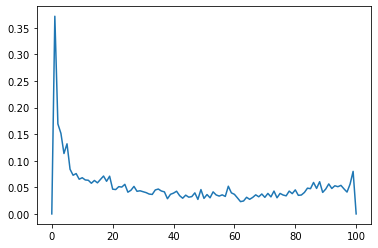

In [7]:
# averaging the percentile differences for each percentile 
av_per_dif_lin = np.mean(per_dif, axis = 1)

plt.plot(percentile_lin, av_per_dif_lin)

np.mean(av_per_dif_lin) # we have an average error of 0.05 % - what is our expected tolerance ?


In [89]:
## understanding the compression parameter 


digest_changeK = TDigest(delta=100, K=25) 


#digest.update(u_point[xt].values) # this is a single value 


0.6642585575580597